<a href="https://colab.research.google.com/github/AngelKociankowski/MIA/blob/MIA1/Actividad8RLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   NOMBRE: ---Angel Sebastian Kociankowski Montelongo-------------------------------------------
*   MATRÍCULA: ----A01379225----------------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 8/Actividad8_RLineal"
print(os.path.exists(DIR))


True


In [28]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 8/Actividad8_RLineal"
os.chdir(DIR)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [35]:

stats = insurance_df.describe(include='all')

print(stats)

                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    

1b) Búsqueda de valores faltantes.

In [37]:
missing_values = insurance_df.isnull().sum()

print(missing_values)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de
barras con la frecuencia para las variables categóricas.

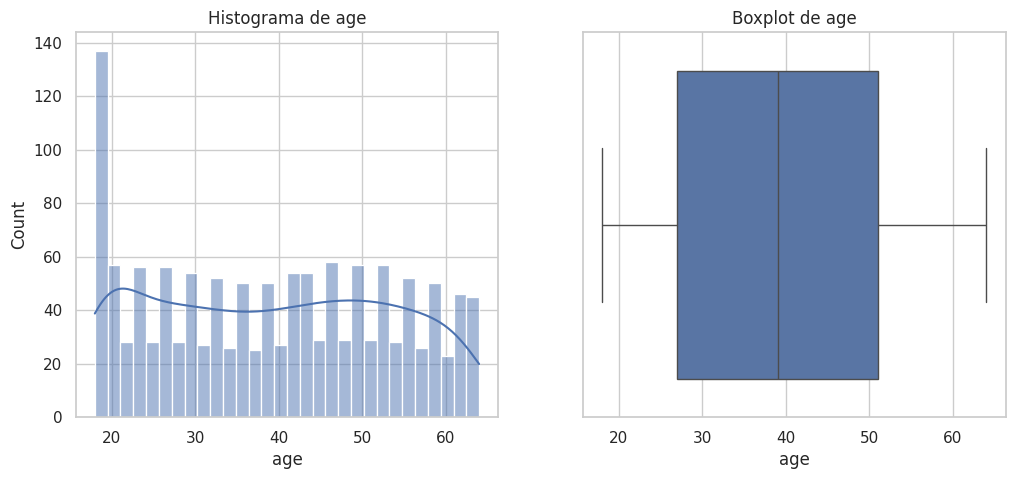

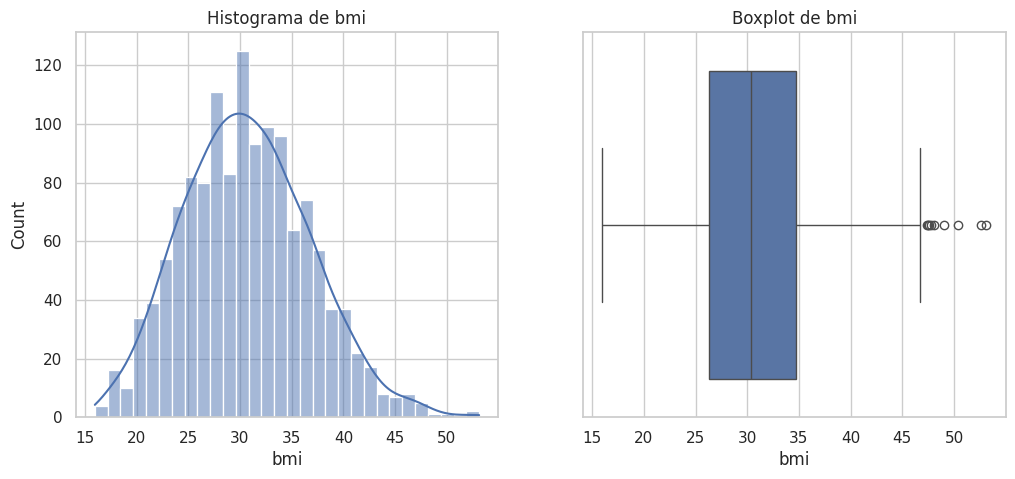

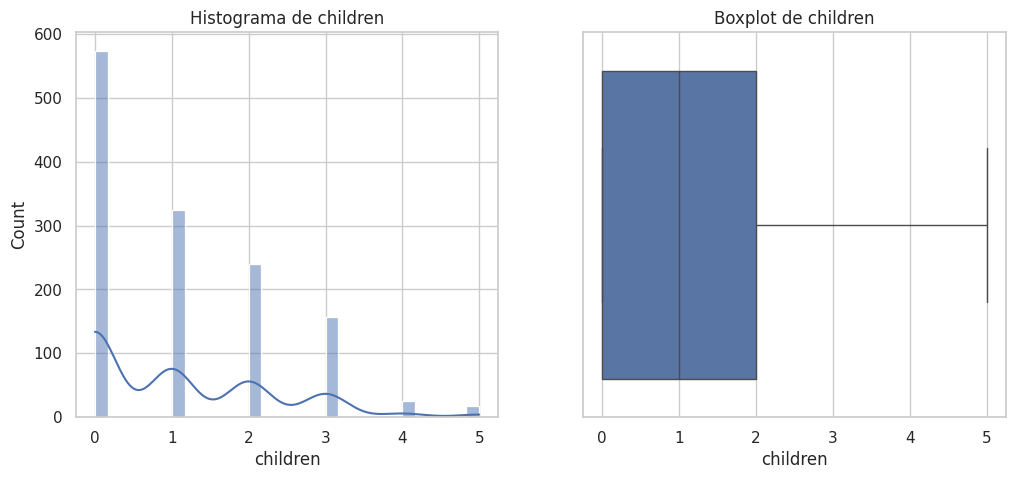

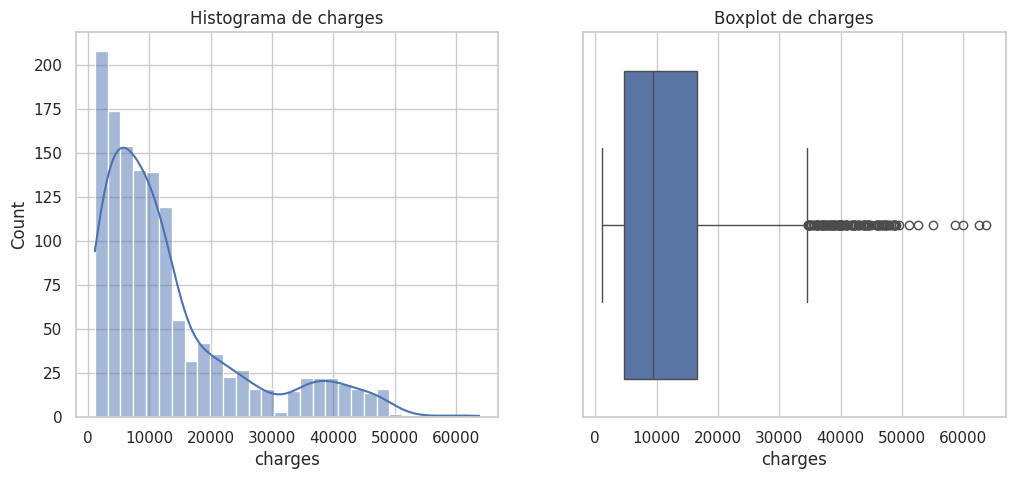

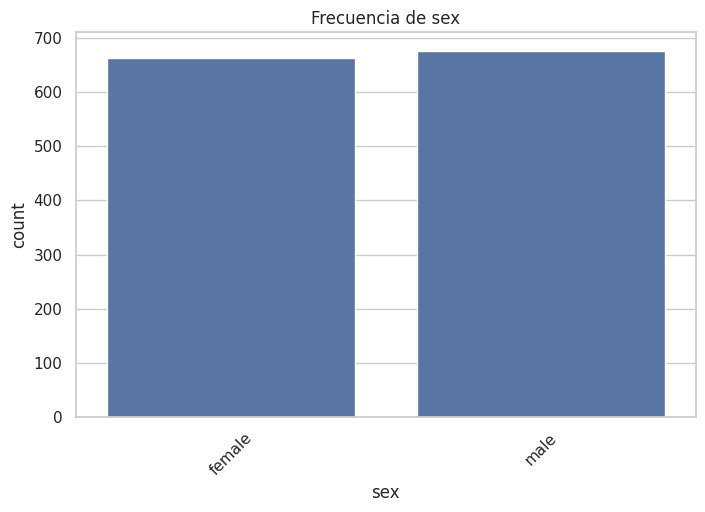

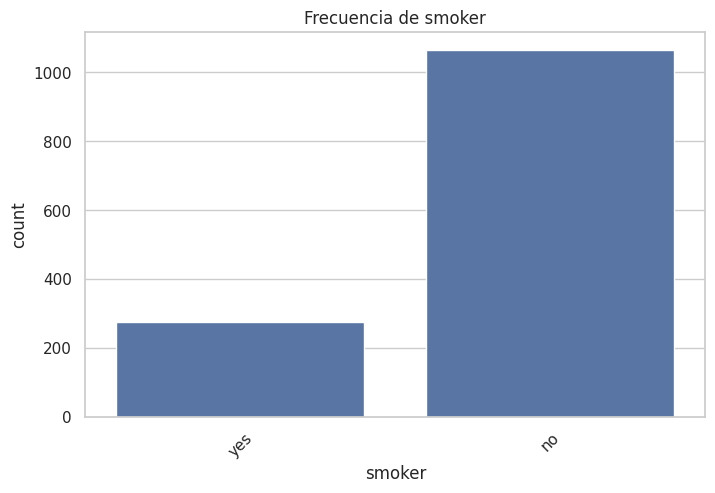

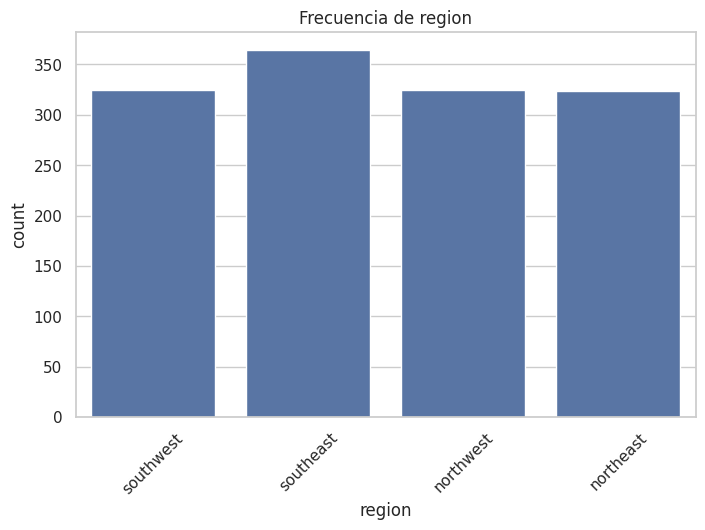

In [41]:
sns.set(style="whitegrid")

quantitative_vars = insurance_df.select_dtypes(include=['number']).columns

for col in quantitative_vars:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(insurance_df[col], kde=True, bins=30)
    plt.title(f'Histograma de {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=insurance_df[col])
    plt.title(f'Boxplot de {col}')

    plt.show()

categorical_vars = insurance_df.select_dtypes(include=['object']).columns

for col in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=insurance_df[col])
    plt.title(f'Frecuencia de {col}')
    plt.xticks(rotation=45)
    plt.show()


Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

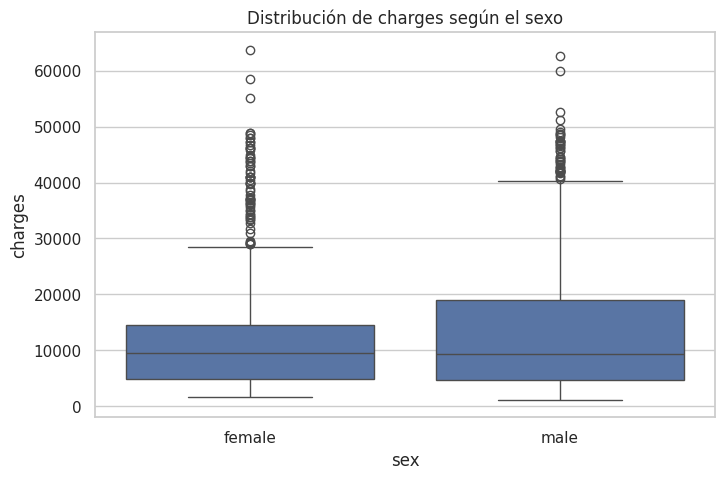

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=insurance_df["sex"], y=insurance_df["charges"])
plt.title("Distribución de charges según el sexo")
plt.show()

No hay diferencias significativas en la distribución de las primas entre hombres y mujeres.
Ambas distribuciones tienen valores similares de mediana y rango intercuartil.
Existen outliers en ambos sexos, indicando que algunas personas tienen costos de seguro muy elevados, posiblemente por factores como edad, tabaquismo o condiciones de salud.


2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

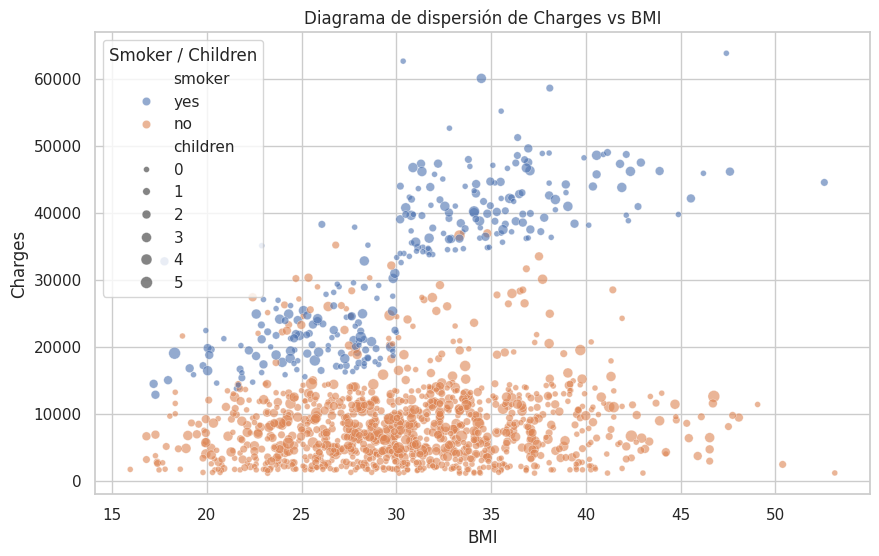

In [43]:

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=insurance_df,
    x="bmi",
    y="charges",
    hue="smoker",
    size="children",
    alpha=0.6
)

plt.title("Diagrama de dispersión de Charges vs BMI")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend(title="Smoker / Children")
plt.show()

El factor "smoker" es el que más influye en las primas del seguro, con fumadores pagando significativamente más. Mientras que el BMI tiene cierto efecto, este es mucho más pronunciado en fumadores que en no fumadores.


2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

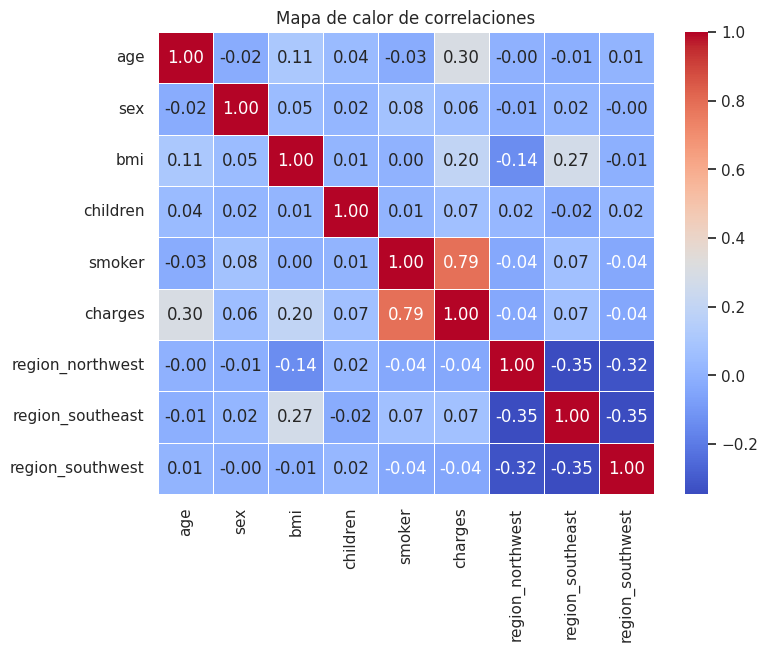

In [45]:
insurance_numeric = insurance_df.copy()
insurance_numeric["sex"] = insurance_numeric["sex"].map({"male": 1, "female": 0})
insurance_numeric["smoker"] = insurance_numeric["smoker"].map({"yes": 1, "no": 0})
insurance_numeric = pd.get_dummies(insurance_numeric, columns=["region"], drop_first=True)


plt.figure(figsize=(8, 6))
sns.heatmap(insurance_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi` en el dataframe de valores atípicos obtenido?

In [46]:
Q1 = insurance_df["charges"].quantile(0.25)
Q3 = insurance_df["charges"].quantile(0.75)
IQR = Q3 - Q1

outlier_threshold = Q3 + 1.5 * IQR

outliers_df = insurance_df[insurance_df["charges"] > outlier_threshold]

mean_age_outliers = outliers_df["age"].mean()
mean_bmi_outliers = outliers_df["bmi"].mean()

print("Promedio de age en valores atípicos:", mean_age_outliers)
print("Promedio de bmi en valores atípicos:", mean_bmi_outliers)


Promedio de age en valores atípicos: 41.07913669064748
Promedio de bmi en valores atípicos: 35.564604316546756


3b) ¿Qué porcentaje de estas observaciones (en el dataframe de valores atípicos obtenidos) se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

In [47]:
gender_distribution = outliers_df["sex"].value_counts(normalize=True) * 100

smoker_distribution = outliers_df["smoker"].value_counts(normalize=True) * 100

print("Porcentaje de hombres y mujeres en valores atípicos:")
print(gender_distribution)

print("\nPorcentaje de fumadores y no fumadores en valores atípicos:")
print(smoker_distribution)


Porcentaje de hombres y mujeres en valores atípicos:
sex
male      64.028777
female    35.971223
Name: proportion, dtype: float64

Porcentaje de fumadores y no fumadores en valores atípicos:
smoker
yes    97.841727
no      2.158273
Name: proportion, dtype: float64


# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [48]:
X = insurance_df.drop(columns=["charges"])
y = insurance_df["charges"]


5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [49]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=X["smoker"]
)


6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

preprocessing = ColumnTransformer([
    ("num", MinMaxScaler(), numeric_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])


# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


X = insurance_df.drop(columns=["charges"])
y = insurance_df["charges"]

Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=X["smoker"]
)

numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

preprocessing = ColumnTransformer([
    ("num", MinMaxScaler(), numeric_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

lr_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("regressor", LinearRegression())
])

lr_pipeline.fit(Xtrain, ytrain)

y_pred = lr_pipeline.predict(Xtest)

rmse = np.sqrt(mean_squared_error(ytest, y_pred))
r2 = r2_score(ytest, y_pred)

print("RMSE:", rmse)
print("R^2:", r2)


RMSE: 5698.759784532356
R^2: 0.7538547215244324


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [54]:
Q1 = ytrain.quantile(0.25)
Q3 = ytrain.quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

ytrain_cleaned = ytrain.copy()
ytest_cleaned = ytest.copy()

ytrain_cleaned.loc[ytrain_cleaned > outlier_threshold] = outlier_threshold
ytest_cleaned.loc[ytest_cleaned > outlier_threshold] = outlier_threshold

lr_model2 = Pipeline([
    ("preprocessing", preprocessing),
    ("regressor", LinearRegression())
])

lr_model2.fit(Xtrain, ytrain_cleaned)

y_pred2 = lr_model2.predict(Xtest)

rmse2 = np.sqrt(mean_squared_error(ytest_cleaned, y_pred2))
r2_2 = r2_score(ytest_cleaned, y_pred2)

print("RMSE:", rmse2)
print("R^2:", r2_2)


RMSE: 4995.027100717612
R^2: 0.7605675404609118


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [55]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

ordinal_categories = {
    "sex": ["female", "male"],
    "smoker": ["no", "yes"],
    "region": ["southwest", "southeast", "northwest", "northeast"]
}

preprocessing2 = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OrdinalEncoder(categories=[ordinal_categories[cat] for cat in categorical_features]), categorical_features)
])

lr_model3 = Pipeline([
    ("preprocessing2", preprocessing2),
    ("regressor", LinearRegression())
])

lr_model3.fit(Xtrain, ytrain_cleaned)

y_pred3 = lr_model3.predict(Xtest)

rmse3 = np.sqrt(mean_squared_error(ytest_cleaned, y_pred3))
r2_3 = r2_score(ytest_cleaned, y_pred3)

print("RMSE:", rmse3)
print("R^2:", r2_3)



RMSE: 4994.258863381279
R^2: 0.760641184429659


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [56]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

preprocessing3 = ColumnTransformer([
    ("num", Pipeline([("poly", poly_features), ("scaler", StandardScaler())]), numeric_features),
    ("cat", OrdinalEncoder(categories=[ordinal_categories[cat] for cat in categorical_features]), categorical_features)
])

lr_model4 = Pipeline([
    ("preprocessing3", preprocessing3),
    ("regressor", LinearRegression())
])

lr_model4.fit(Xtrain, ytrain_cleaned)

y_pred4 = lr_model4.predict(Xtest)

rmse4 = np.sqrt(mean_squared_error(ytest_cleaned, y_pred4))
r2_4 = r2_score(ytest_cleaned, y_pred4)

print("RMSE:", rmse4)
print("R^2:", r2_4)


RMSE: 4956.555891211256
R^2: 0.764241508201849


El modelo con regresión polinomial obtiene un menor error (RMSE más bajo) y un mejor ajuste (R² más alto), lo que indica que mejora ligeramente el rendimiento en comparación con los modelos lineales simples.